<a href="https://colab.research.google.com/github/rdinit/AI_track_hackaton_2021/blob/main/ai_track_hackathon_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rdinit/ai_track_hackathon_dataset

Cloning into 'ai_track_hackathon_dataset'...
remote: Enumerating objects: 1616, done.
remote: Counting objects: 100% (1616/1616), done.
remote: Compressing objects: 100% (1615/1615), done.
remote: Total 1616 (delta 0), reused 1616 (delta 0), pack-reused 0
Receiving objects: 100% (1616/1616), 68.42 MiB | 28.87 MiB/s, done.


In [2]:
!unzip "ai_track_hackathon_dataset/ball_dataset.zip" -d "ai_track_hackathon_dataset/ball_dataset"

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: ai_track_hackathon_dataset/ball_dataset/positive/learning_set/generated/3_1_409.png  
  inflating: ai_track_hackathon_dataset/ball_dataset/positive/learning_set/generated/3_sym_1_578.png  
  inflating: ai_track_hackathon_dataset/ball_dataset/positive/learning_set/generated/3_sym_1_315.png  
  inflating: ai_track_hackathon_dataset/ball_dataset/positive/learning_set/generated/3_sym_529.png  
  inflating: ai_track_hackathon_dataset/ball_dataset/positive/learning_set/generated/3_1_310.png  
  inflating: ai_track_hackathon_dataset/ball_dataset/positive/learning_set/generated/3_sym_1_310.png  
  inflating: ai_track_hackathon_dataset/ball_dataset/positive/learning_set/generated/3_73.png  
  inflating: ai_track_hackathon_dataset/ball_dataset/positive/learning_set/generated/3_sym_73.png  
  inflating: ai_track_hackathon_dataset/ball_dataset/positive/learning_set/generated/3_1_93.png  
  inflating: ai_track_hackatho

In [3]:
!rm -rf ai_track_hackathon_dataset/ball_dataset/positive/learning_set
!rm -rf ai_track_hackathon_dataset/ball_dataset/positive/test_set
!rm -rf ai_track_hackathon_dataset/ball_dataset/negative/learning_set
!rm -rf ai_track_hackathon_dataset/ball_dataset/negative/test_set

In [4]:
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
from matplotlib import pyplot as plt

In [5]:
train_ds = keras.preprocessing.image_dataset_from_directory(
  directory='ai_track_hackathon_dataset/ball_dataset',
  color_mode="rgb",
  batch_size=128,
  image_size=(32, 32),
  validation_split=0.2,
  subset="training",
  shuffle=True,
  seed=123
)

val_ds = keras.preprocessing.image_dataset_from_directory(
  directory='ai_track_hackathon_dataset/ball_dataset',
  color_mode="rgb",
  batch_size=128,
  image_size=(32, 32),
  validation_split=0.2,
  subset="validation",
  shuffle=True,
  seed=123
)

Found 10838 files belonging to 2 classes.
Using 8671 files for training.
Found 10838 files belonging to 2 classes.
Using 2167 files for validation.


In [6]:
class_names = train_ds.class_names

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


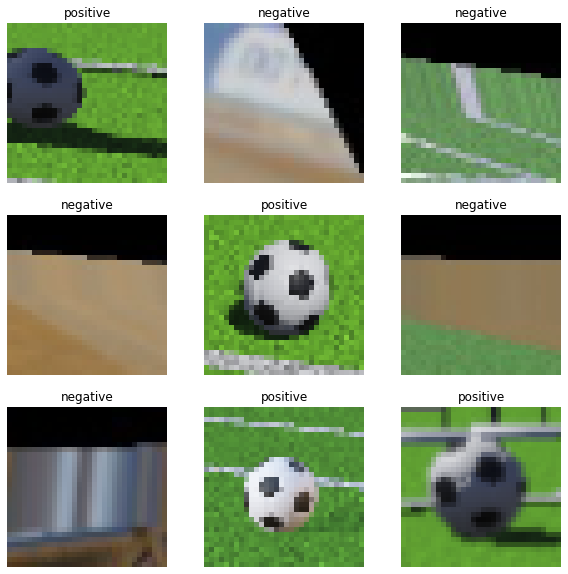

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #print(int(labels[i]))
    plt.title(class_names[int(labels[i])])
    plt.axis("off")

In [8]:
#!ls ai_track_hackathon_dataset/ball_dataset/negative/learning_set

In [9]:
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
model = Sequential([
    #layers.Lambda(tf.image.rgb_to_hsv),
    #layers.Lambda(rgb_to_grayscale),
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    layers.Conv2D(4, (3, 3)),
    layers.Activation('relu'),
    layers.Conv2D(8, (3, 3)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, (3, 3)),
    layers.Activation('relu'),
    layers.Conv2D(32, (3, 3)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(32),
    layers.Dropout(0.5),
    layers.Activation('relu'),
    layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


In [16]:
def draw_graph(m1, m2):
    plt.plot(m1[0])
    plt.plot(m1[1])#val
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(m2[0])
    plt.plot(m2[1])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    filepath='checkpoints/modelcheckpoint_{val_accuracy}_{epoch}_{loss}',
    monitor="val_loss",
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    options=None,
    shuffle=True
)

Epoch 1/5
68/68 [==============================] - 4s 51ms/step - loss: 0.3230 - accuracy: 0.8485 - val_loss: 0.0440 - val_accuracy: 0.9829
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9829257130622864_1_0.3229730427265167/assets
Epoch 2/5
68/68 [==============================] - 4s 48ms/step - loss: 0.0417 - accuracy: 0.9869 - val_loss: 0.0218 - val_accuracy: 0.9949
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9949238300323486_2_0.04168972000479698/assets
Epoch 3/5
68/68 [==============================] - 4s 49ms/step - loss: 0.0187 - accuracy: 0.9946 - val_loss: 0.0155 - val_accuracy: 0.9963
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9963082671165466_3_0.01867254450917244/assets
Epoch 4/5
68/68 [==============================] - 4s 48ms/step - loss: 0.0115 - accuracy: 0.9975 - val_loss: 0.0091 - val_accuracy: 0.9972
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9972311854362488_4_0.011522362940013409/ass

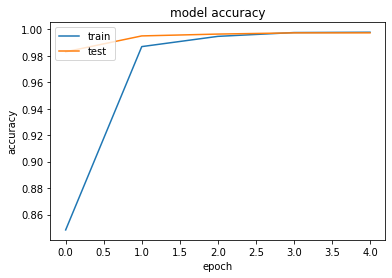

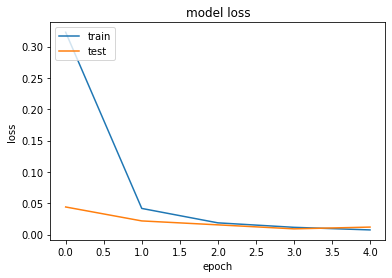

Epoch 1/5
68/68 [==============================] - 4s 49ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.0059 - val_accuracy: 0.9982
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9981541037559509_1_0.006625065580010414/assets
Epoch 2/5
68/68 [==============================] - 4s 49ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0102 - val_accuracy: 0.9977
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9976926445960999_2_0.005605807062238455/assets
Epoch 3/5
68/68 [==============================] - 4s 49ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0069 - val_accuracy: 0.9977
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9976926445960999_3_0.0035457939375191927/assets
Epoch 4/5
68/68 [==============================] - 4s 48ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0095 - val_accuracy: 0.9977
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9976926445960999_4_0.00425999239087104

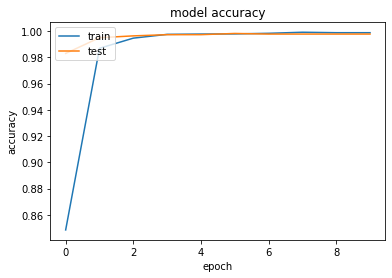

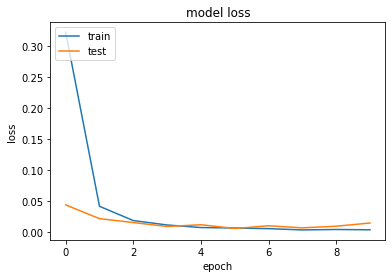

Epoch 1/5
68/68 [==============================] - 4s 49ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.0168 - val_accuracy: 0.9972
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9972311854362488_1_0.003460915060713887/assets
Epoch 2/5
68/68 [==============================] - 4s 48ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0046 - val_accuracy: 0.9977
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9976926445960999_2_0.0022535501047968864/assets
Epoch 3/5
68/68 [==============================] - 4s 48ms/step - loss: 0.0015 - accuracy: 0.9990 - val_loss: 0.0113 - val_accuracy: 0.9982
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9981541037559509_3_0.0014966489979997277/assets
Epoch 4/5
68/68 [==============================] - 4s 50ms/step - loss: 0.0021 - accuracy: 0.9990 - val_loss: 0.0100 - val_accuracy: 0.9977
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9976926445960999_4_0.0020659663714468

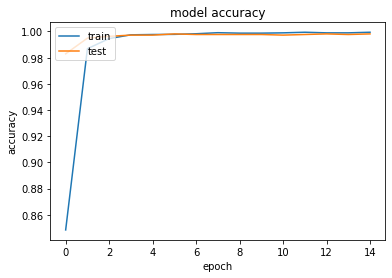

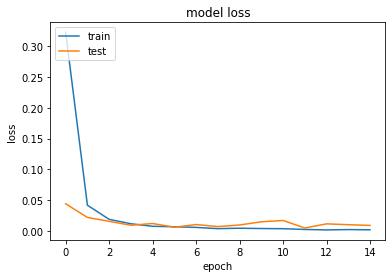

Epoch 1/5
68/68 [==============================] - 4s 48ms/step - loss: 9.2746e-04 - accuracy: 0.9998 - val_loss: 0.0064 - val_accuracy: 0.9986
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9986156225204468_1_0.0009274567710235715/assets
Epoch 2/5
68/68 [==============================] - 4s 49ms/step - loss: 0.0010 - accuracy: 0.9994 - val_loss: 0.0139 - val_accuracy: 0.9982
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9981541037559509_2_0.0010340312728658319/assets
Epoch 3/5
68/68 [==============================] - 4s 49ms/step - loss: 8.7809e-04 - accuracy: 0.9998 - val_loss: 0.0124 - val_accuracy: 0.9982
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9981541037559509_3_0.0008780864300206304/assets
Epoch 4/5
68/68 [==============================] - 4s 49ms/step - loss: 5.3003e-04 - accuracy: 0.9999 - val_loss: 0.0193 - val_accuracy: 0.9982
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9981541037559509_4_0.000

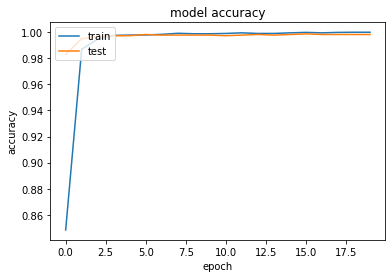

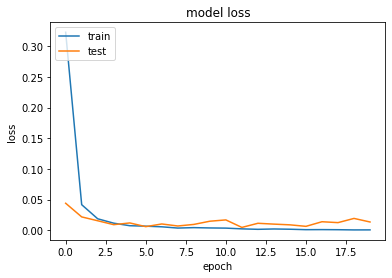

Epoch 1/5
68/68 [==============================] - 4s 49ms/step - loss: 7.0639e-04 - accuracy: 0.9997 - val_loss: 0.0195 - val_accuracy: 0.9982
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9981541037559509_1_0.0007063919911161065/assets
Epoch 2/5
68/68 [==============================] - 4s 49ms/step - loss: 0.0011 - accuracy: 0.9991 - val_loss: 0.0236 - val_accuracy: 0.9977
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9976926445960999_2_0.0010675102239474654/assets
Epoch 3/5
68/68 [==============================] - 4s 49ms/step - loss: 3.3241e-04 - accuracy: 0.9999 - val_loss: 0.0170 - val_accuracy: 0.9982
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9981541037559509_3_0.00033241373603232205/assets
Epoch 4/5
68/68 [==============================] - 4s 50ms/step - loss: 5.7419e-04 - accuracy: 0.9995 - val_loss: 0.0142 - val_accuracy: 0.9982
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9981541037559509_4_0.00

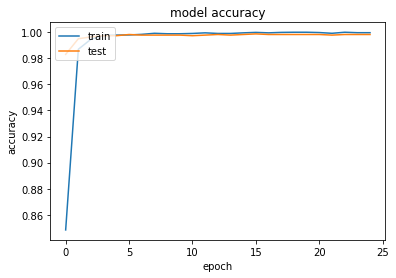

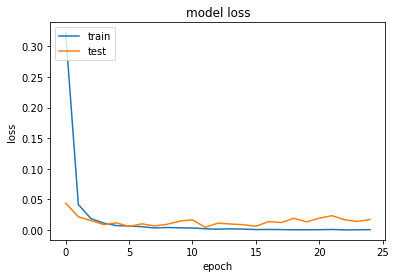

Epoch 1/5
68/68 [==============================] - 4s 51ms/step - loss: 0.0025 - accuracy: 0.9991 - val_loss: 0.0101 - val_accuracy: 0.9977
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9976926445960999_1_0.0024816200602799654/assets
Epoch 2/5
68/68 [==============================] - 4s 50ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.0031 - val_accuracy: 0.9991
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9990770816802979_2_0.004120456986129284/assets
Epoch 3/5
68/68 [==============================] - 4s 51ms/step - loss: 7.9643e-04 - accuracy: 0.9998 - val_loss: 0.0113 - val_accuracy: 0.9986
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9986156225204468_3_0.000796428881585598/assets
Epoch 4/5
68/68 [==============================] - 4s 50ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0080 - val_accuracy: 0.9972
INFO:tensorflow:Assets written to: checkpoints/modelcheckpoint_0.9972311854362488_4_0.0040303175337

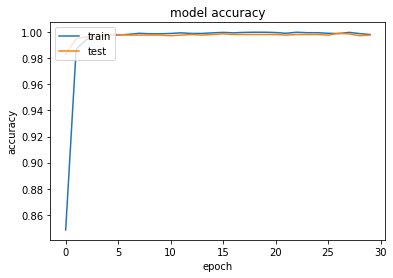

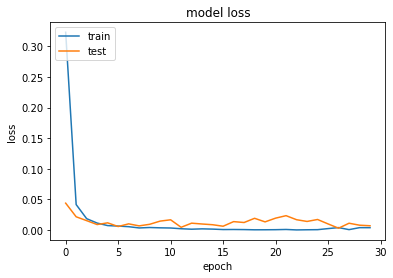

In [19]:
epochs=30
all_history = {'accuracy': [], 'val_accuracy':[], 'loss':[], 'val_loss':[]}
for i in range(epochs // 5):
    history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    callbacks=[model_checkpoint]
    )
    all_history['accuracy']+=history.history['accuracy']
    all_history['val_accuracy'] += history.history['val_accuracy']
    all_history['loss'] += history.history['loss']
    all_history['val_loss'] += history.history['val_loss']
    print(all_history)
    draw_graph([all_history['accuracy'], all_history['val_accuracy']],
               [all_history['loss'], all_history['val_loss']])

In [20]:
!ls checkpoints

modelcheckpoint_0.9829257130622864_1_0.3229730427265167
modelcheckpoint_0.9949238300323486_2_0.04168972000479698
modelcheckpoint_0.9963082671165466_3_0.01867254450917244
modelcheckpoint_0.9972311854362488_1_0.003460915060713887
modelcheckpoint_0.9972311854362488_4_0.004030317533761263
modelcheckpoint_0.9972311854362488_4_0.011522362940013409
modelcheckpoint_0.9972311854362488_5_0.007387510035187006
modelcheckpoint_0.9976926445960999_1_0.0024816200602799654
modelcheckpoint_0.9976926445960999_2_0.0010675102239474654
modelcheckpoint_0.9976926445960999_2_0.0022535501047968864
modelcheckpoint_0.9976926445960999_2_0.005605807062238455
modelcheckpoint_0.9976926445960999_3_0.0035457939375191927
modelcheckpoint_0.9976926445960999_4_0.002065966371446848
modelcheckpoint_0.9976926445960999_4_0.004259992390871048
modelcheckpoint_0.9976926445960999_5_0.0037460692692548037
modelcheckpoint_0.9976926445960999_5_0.003978191874921322
modelcheckpoint_0.9981541037559509_1_0.0007063919911161065
modelcheckpo

In [25]:
mv checkpoints/modelcheckpoint_0.9986156225204468_3_0.000796428881585598 /weights

mv: cannot stat 'checkpoints/modelcheckpoint_0.9986156225204468_3_0.000796428881585598': No such file or directory


In [26]:
ls /weights

assets/  keras_metadata.pb  saved_model.pb  variables/


In [27]:
!zip -r modelcheckpoint.zip weights

  adding: weights/ (stored 0%)
